# Algoritmo Maximizacion de Esperanzas

Consiste en un algoritmo iterativo en donde se calcula la esperanza, y luego se obtiene la esperanza maxima, y se sigue iterando hasta (esperemos que si) que se obtenga el maximo global. Puede que a veces el algoritmo se quede pegado en un maximo local :(.

Aqui una de las metricas importantes es la verosimilitud (likelihood), pero no se por que.

- Criterio de Informacion de Akaike:

AIC = -2(Verosimilitud Modelo - N Parametros)

- Criterio de Informacion de Schwarz-Bayes

BIC = ln(# params)(Verosimilitud Modelo - N Parametros)

Estos estadisticos permiten estimar la verosimilitud de un modelo predictivo. Mientras menor sea el estadistico, mejor. El BIC es mejor.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lec6_graphs as afx

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df['class'].value_counts()

Normal      76
Chemical    36
Overt       33
Name: class, dtype: int64

- Primero, se calcula la cantidad de clusters a generar de un set de datos.
- Luego, para cada clusters se le calcula el AIC/BIC. Mientras menor, significa que los datos son mas similares entre si.
- Finalmente se grafica para cada cluster su AIC/BIC.

# Esperanza y Maximizacion

Sirve para situar los clusters en cada uno de los sets de datos. Usando la esperanza y maximizando la verosimilitud, se puede obtener cada una de las distribucion normales de los clusters.

El problema surge cuando quiero seleccionar QUE DATOS voy a ocupar para cada cluster de datos. AL fnal, se pueden obtener combinaciones infinitas (o la combinatoria de la cantidad de datos) de datos para hacer un cluster. Por lo tanto, con el algoritmo de la esperanza y maximizacion, puedo obtener los mejores clusters que tengan la mejor verosimilitud entre si.

In [7]:
df

,Unnamed: 0,class,glucose,insulin,sspg
0,1,Normal,80,356,124
1,2,Normal,97,289,117
2,3,Normal,105,319,143
3,4,Normal,90,356,199
4,5,Normal,90,323,240
...,...,...,...,...,...
140,141,Overt,353,1428,41
141,142,Overt,180,923,77
142,143,Overt,213,1025,29
143,144,Overt,328,1246,124


c:\Users\javie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\javie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

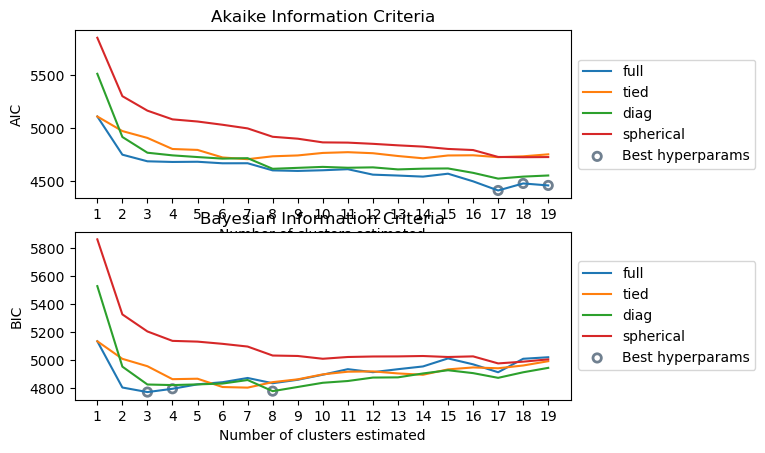

In [10]:
afx.gmm_information_criteria_report(df.loc[:, 'glucose': 'sspg'])

Con el predict de este algoritmo se puede predecir o el cluster en donde caera el nuevo dato.

Hay distintos tipos de covarianza (como se calcula la covarianza entre los datos). Esto genera diversas elipses...

- ```full```: Cada componente del modelo tiene su propia matriz de covarianza. Por lo tanto, su costo computacional es alto
- ```tied```: Se genera 1 matriz de covarianza!. Todos los componentes o clusters tienen la misma covarianza.
- ```spherical```: Cada componente tiene tienen su diagonal de la matriz de covarianza. 
- ```diag```: Cada componente tiene su propia unica varianza.

Al final, es mejor probarlos todos lel. Es un hiperparametro.

Si yo se a prori que los clusters entre si DEBEN tener un comportamiento especifico (ej: Todos los clusters tienen la misma covarianza, o sea se debe ocupar tied), entonces restringo el tipo de covarianza a calcular.

In [11]:
df

,Unnamed: 0,class,glucose,insulin,sspg
0,1,Normal,80,356,124
1,2,Normal,97,289,117
2,3,Normal,105,319,143
3,4,Normal,90,356,199
4,5,Normal,90,323,240
...,...,...,...,...,...
140,141,Overt,353,1428,41
141,142,Overt,180,923,77
142,143,Overt,213,1025,29
143,144,Overt,328,1246,124


In [14]:


x_mat = df.loc[:, 'glucose':'sspg']
X = StandardScaler().fit_transform(x_mat)
y = df['class']
gaussian = GaussianMixture(n_components=3, covariance_type='diag', random_state=323).fit(X)
gaussian.fit(X, y)

GaussianMixture(covariance_type='diag', n_components=3, random_state=323)

In [16]:
gaussian.aic(X)

502.5063444610174

# Deteccion de Anomalias

- Puede que ocurra que ya se hayan generado los clusters, pero se ingrese un nuevo dato y quede demasiado lejos de alguno de los clusters ya predichos. En este caso, es poco probable que este dato pertenezca a algunos de los clusters. En el caso anterior, entonces es muy probable que este dato sea anomalo!

- Esta utilizacion requiere un dataset muy limpio. Por ejemplo, tener un dataset muy limpio de clientes no morosos. Si luego llega uno moroso, entonces el algoritmo debe detectar que es un outlier.